In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob, Word
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [2]:
# Load and preprocess the data
data = pd.read_csv('/Users/saim/Desktop/AmazonReview.csv')

In [3]:
data


,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1
...,...,...
24995,These cables (lightning) are far superior to m...,5
24996,This unit performs exactly as advertised. I u...,5
24997,I had the key cut at a local hardware store cu...,5
24998,I love my case I ordered from amazon. It wasn'...,5


In [4]:
#preprocessing and cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
#drop null values
data.dropna(inplace=True)

In [6]:
#there are 5 ratings convert these to positive =1 and negative=0
#1,2,3->negative(i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment'] = 0
 
#4,5->positive(i.e 1)
data.loc[data['Sentiment']>3,'Sentiment'] = 1

In [30]:
#convert upper case to lower case
data['Review'] = data['Review'].str.lower()

In [7]:
#remove all punctuations
data['Review'] = data['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

In [7]:
#remove numbers
data['Review'] = data['Review'].str.replace('\d', '')

In [31]:
data['Review']

0        fast shipping product cheaply made brought gra...
1                 case takes long ship even worth dont buy
2        good droids good iphones cannot use features w...
3        cable compatible macbook iphone also connector...
4        case nice glow light im disappointed product d...
                               ...                        
24995    cables lightning far superior cables market ev...
24996    unit performs exactly advertised use climbing ...
24997    key cut local hardware store cut free programm...
24998    love case ordered amazon wasnt color looked on...
24999    awsome loved little speaker great sound super ...
Name: Review, Length: 24999, dtype: object

In [32]:
sw = stopwords.words('english')

In [33]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
#remove stopwords
data['Review'] = data['Review'].apply(lambda x: " ".join([x for x in str(x).split() if x not in sw]))

In [10]:
data['Review']

0        fast shipping product cheaply made brought gra...
1                 case takes long ship even worth dont buy
2        good droids good iphones cannot use features w...
3        cable compatible macbook iphone also connector...
4        case nice glow light im disappointed product d...
                               ...                        
24995    cables lightning far superior cables market ev...
24996    unit performs exactly advertised use climbing ...
24997    key cut local hardware store cut free programm...
24998    love case ordered amazon wasnt color looked on...
24999    awsome loved little speaker great sound super ...
Name: Review, Length: 24999, dtype: object

In [36]:
#thanks to to textblob we can extract nouns and adjectives from text. 
nltk.download("punkt")

from textblob import TextBlob, Word, Blobber

[nltk_data] Downloading package punkt to /Users/saim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
data['Review'].apply(lambda x: TextBlob(x).words).head()

0    [fast, shipping, product, cheaply, made, broug...
1    [case, takes, long, ship, even, worth, dont, buy]
2    [good, droids, good, iphones, can, not, use, f...
3    [cable, compatible, macbook, iphone, also, con...
4    [case, nice, glow, light, im, disappointed, pr...
Name: Review, dtype: object

In [38]:
#lemmatize (normalize words)
data['Review'] = data['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Review'].head()

0    fast shipping product cheaply made brought gra...
1              case take long ship even worth dont buy
2    good droids good iphones cannot use feature wa...
3    cable compatible macbook iphone also connector...
4    case nice glow light im disappointed product d...
Name: Review, dtype: object

In [39]:
# Perform term frequency analysis and visualization
term_frequancy = data['Review'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

#retrive words which are greater than 2000
term_frequancy.columns = ["words", "term_frequancy"]
term_frequancy_2 = term_frequancy[term_frequancy["term_frequancy"] > 2000].sort_values("term_frequancy", ascending=False)

In [40]:
term_frequancy_2

,words,term_frequancy
133,work,8925.0
91,one,8015.0
18,case,7249.0
139,br,6836.0
10,would,6532.0
4,good,6373.0
16,product,6296.0
128,get,5725.0
302,great,5567.0
30,use,5554.0


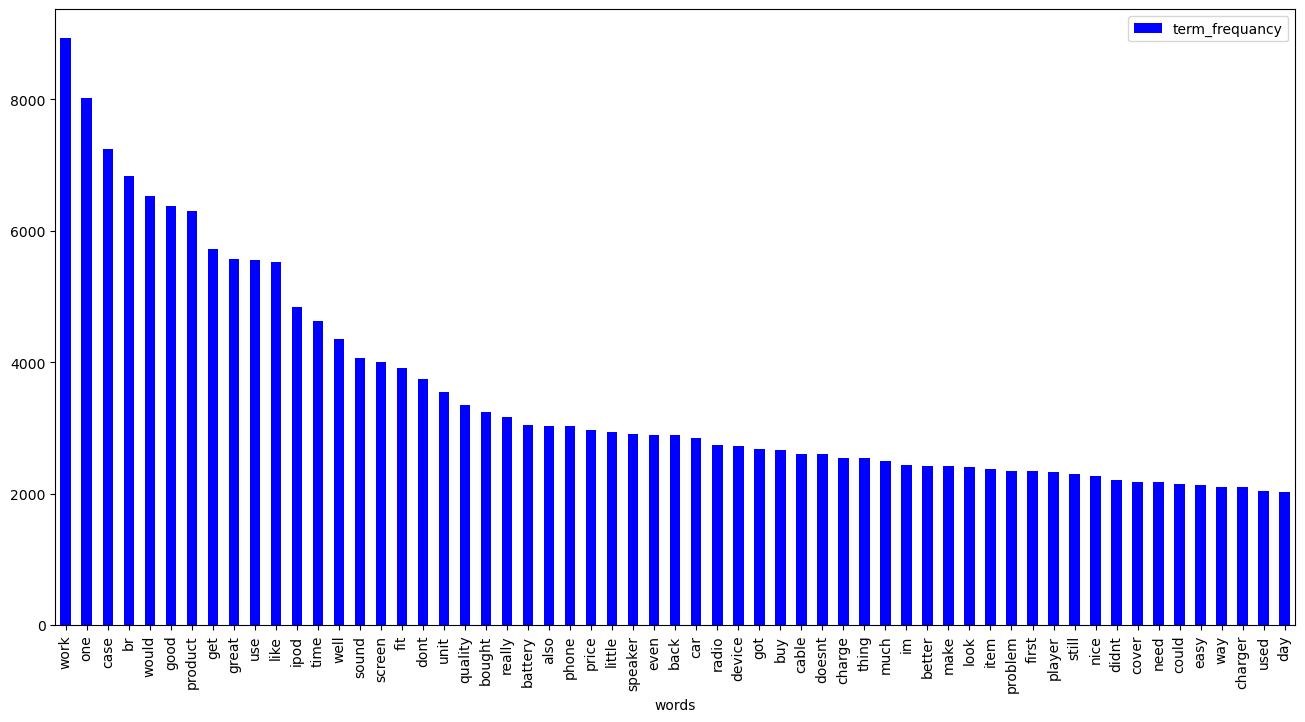

In [41]:

term_frequancy_2 = term_frequancy[term_frequancy["term_frequancy"] > 2000].sort_values("term_frequancy", ascending=False)


fig, ax = plt.subplots(figsize=(16, 8))

term_frequancy_2.plot.bar(x="words", y="term_frequancy", color="blue", ax=ax)

plt.show()

In [42]:
#make it single text
text = " ".join(i for i in data['Review'])
text[0:10000]

'fast shipping product cheaply made brought grandchild ipod would protected fell skin suitable protection good decoration therefore rated case take long ship even worth dont buy good droids good iphones cannot use feature watch iphone wont synch iphone cable compatible macbook iphone also connector came apart cable started fraying case nice glow light im disappointed product didnt meet advertisement cable keep coming message accessory supported bought specifically led believe totally compatible iphone able charge iphone either cable ii throw trash waste money po broke phone us luckily able pull remnant tweezer stay away product suck hard hear wat saying music cut within sec like aukeys product one really disappointed aukey need go back drawing board yeah say mirror screen mean ipod becomes like mirror nearly impossible see actual screen direct sunlight power ac adapter tried several outlet confirmed usb cable worked wall adapter didnt im returning may shell apple brand one much hurt pu

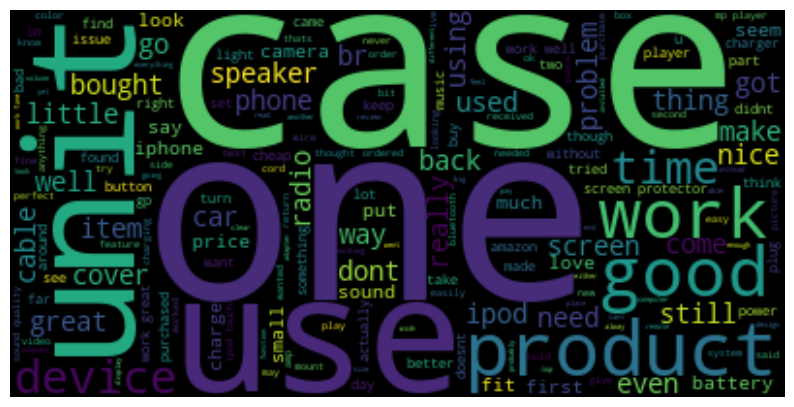

In [43]:
#create cloudword
from wordcloud import WordCloud 
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [44]:
data['Review']

0        fast shipping product cheaply made brought gra...
1                  case take long ship even worth dont buy
2        good droids good iphones cannot use feature wa...
3        cable compatible macbook iphone also connector...
4        case nice glow light im disappointed product d...
                               ...                        
24995    cable lightning far superior cable market even...
24996    unit performs exactly advertised use climbing ...
24997    key cut local hardware store cut free programm...
24998    love case ordered amazon wasnt color looked on...
24999    awsome loved little speaker great sound super ...
Name: Review, Length: 24999, dtype: object

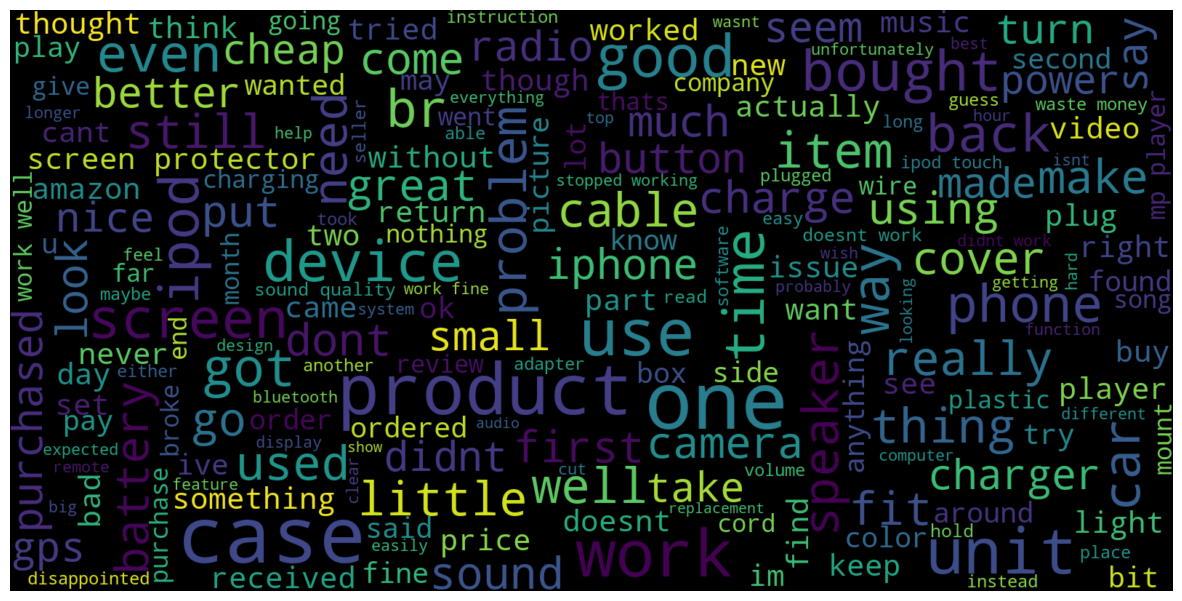

In [45]:
#cloudword of negative reviews
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

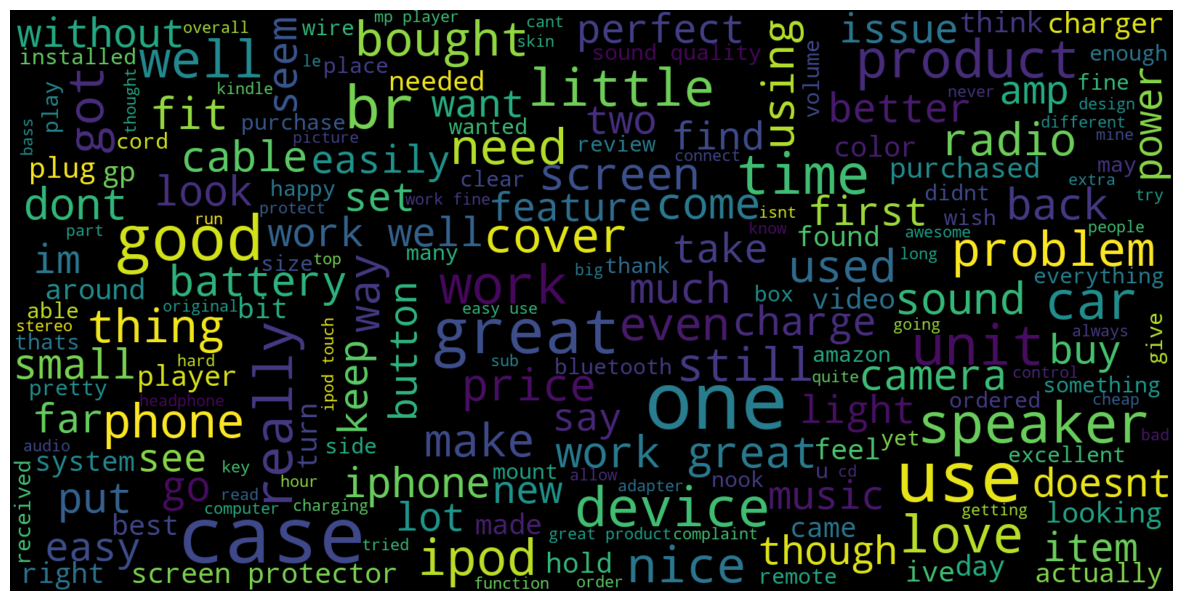

In [46]:
#cloudword of positive reviews
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review'] ).toarray()

In [49]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
model=LogisticRegression()
 
#Model fitting
model.fit(x_train,y_train)
 
#testing the model
pred=model.predict(x_test)
 
#model accuracy
print(accuracy_score(y_test,pred))

0.808


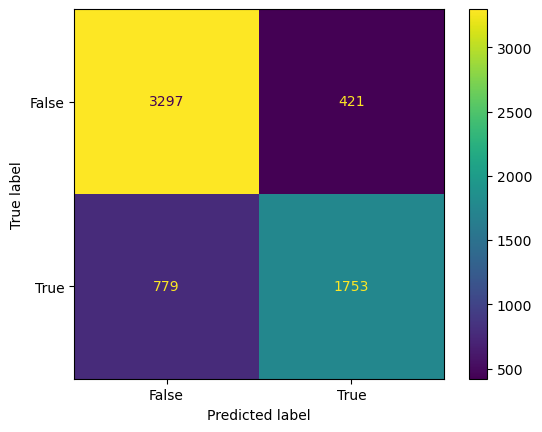

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,pred)
 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()

Our confusion matrix worked relatively well